# x0 cut prediction

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook
 
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

03:51:59 INFO:NumExpr defaulting to 8 threads.


## Loading the data

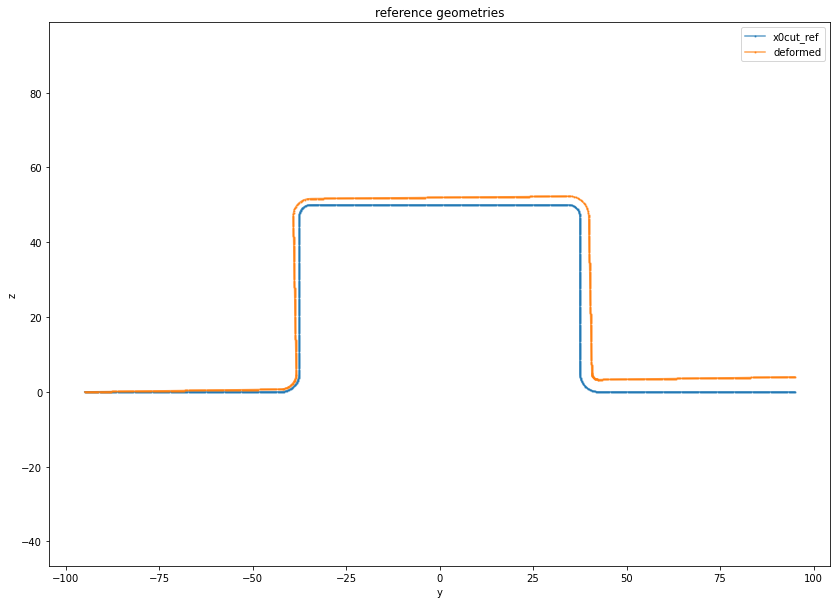

In [2]:
x0cut_ref = pd.read_csv("../data/x0cut_ref.csv", index_col=0)

res = x0cut_ref.copy()
scale = .8
x = res.tp
y = res.tp
res["prediction"] = np.interp(res.tp, x.ravel(), y.ravel())
res["xr"] = res.x + res.nx * res.tp * scale
res["yr"] = res.y + res.ny * res.tp * scale
res["zr"] = res.z + res.nz * res.tp * scale


fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.plot(x0cut_ref.y, x0cut_ref.z, marker="s", ms=1, alpha=.7, label=f"x0cut_ref")
ax.plot(res.yr, res.zr, marker="s", ms=1, alpha=.7, label=f"deformed")
ax.legend(loc="best")
ax.set_title("reference geometries")
ax.set_xlabel("y")
ax.set_ylabel("z")
ax.set_aspect("equal", "datalim")

In [3]:
# Load the data using pandas
doe = pd.read_csv('../data/doe.csv')
doe.head(10)

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.00,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
1,2,5,1.48,400,2.4,3,-4,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
2,3,1,1.00,210,2.4,3,-1,70,70.2,1.71,2.00,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
3,4,2,1.19,390,2.4,3,5,30,70.2,1.71,2.00,200.03813,DC01_1.20mm,160.714935,174.535075,564.455438,424.931018,490.442223
4,5,1,1.00,360,1.6,2,3,30,71.8,1.14,1.33,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
5,6,4,0.99,460,1.6,2,-2,50,71.8,1.14,1.33,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
6,7,4,0.99,500,2.4,3,-3,30,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
7,8,4,0.99,200,2.4,3,2,70,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
8,9,6,1.01,330,1.6,2,0,30,71.8,1.14,1.33,198.98400,HC340LA_1.20mm,296.556500,306.211480,711.700600,556.006850,629.530400
9,10,6,1.01,240,1.6,2,1,70,71.8,1.14,1.33,198.98400,HC340LA_1.20mm,296.556500,306.211480,711.700600,556.006850,629.530400


In [4]:
doe["Ziehspalt"].unique()

array([2.4, 1.6])

In [5]:
# Load the data using pandas
data = pd.read_csv('../data/cut_x0.csv')
data = data.head(-1000) # remove last experiment
data.head(10)

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50,tp,deviationc
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.000000,0.543273
1,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.004115,0.541849
2,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.008230,0.540459
3,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.012346,0.539104
4,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.016461,0.537783
5,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.020576,0.536301
6,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.024691,0.534856
7,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.028807,0.533446
8,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.032922,0.532073
9,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.22696,147.601859,534.002871,377.443009,449.528189,0.037037,0.530738


## Creating the regressor

In [6]:
from cut_predictor import CutPredictor

reg = CutPredictor(
    data = data,
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    categorical = [
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe'
    ],
    position = 'tp',
    output = 'deviationc'
)
reg.load(load_path='20220426-best_x0_model')

Doe_ID 836


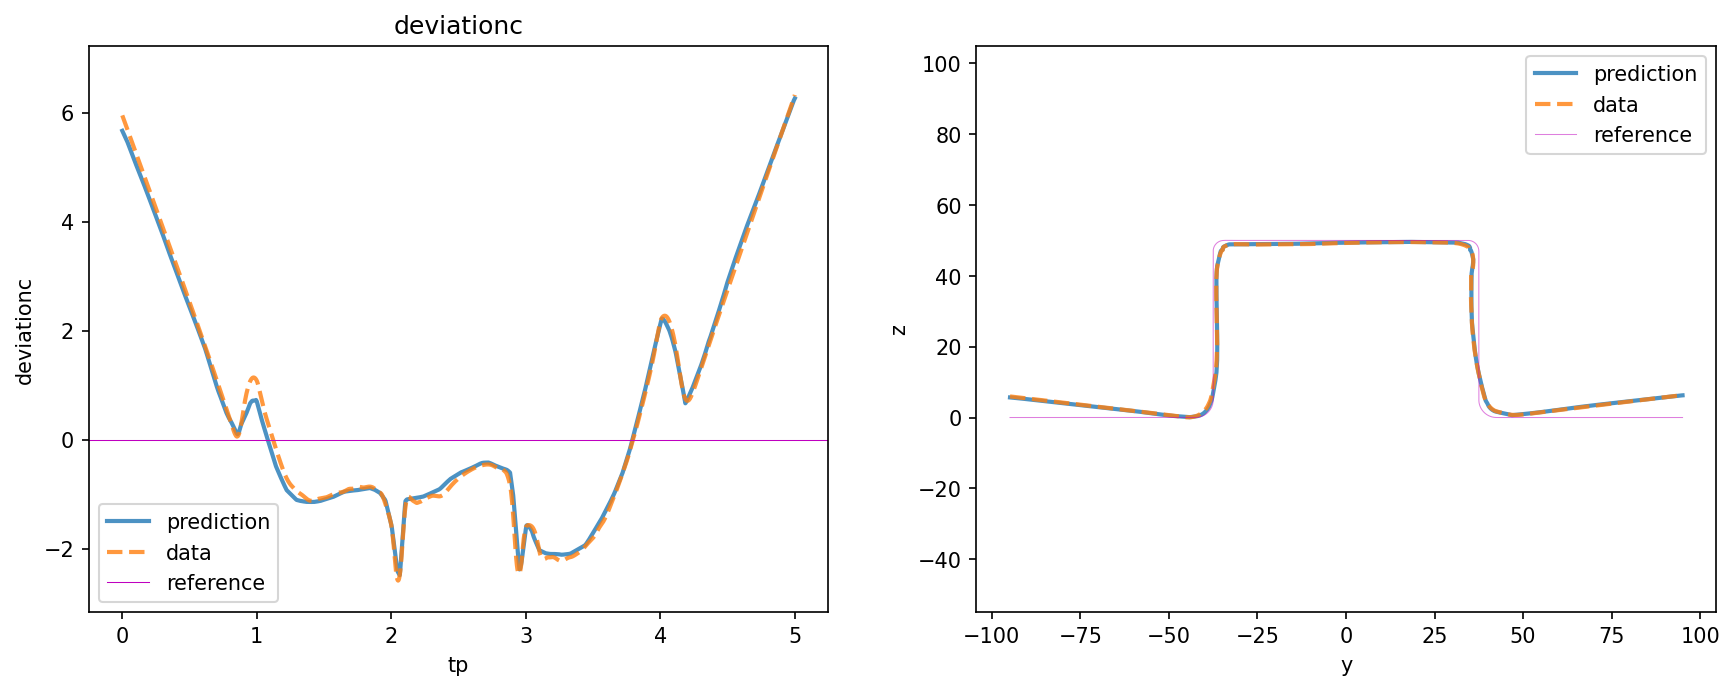

In [26]:
idx = np.random.choice(878)
print("Doe_ID", idx+1)
#reg.compare(idx*1000, (idx+1)*1000)
fig = reg.compare_shape(idx*1000, (idx+1)*1000, x0cut_ref)

In [8]:
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10.0  ...  500.0 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : categorical [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
	- Ziehtiefe : categorical [30, 50, 70]
Position variable:
	- tp : numerical, [ 0.0 / 5.0 ]
Output variable:
	- deviationc : numerical, [ -3.16506211149574 / 7.228601057768613 ]

Inputs
------------------------------------------------------------

(880000, 19)

Outputs
------------------------------------------------------------

(880000,)


In [9]:
# Print a summary of the data
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10.0  ...  500.0 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : categorical [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
	- Ziehtiefe : categorical [30, 50, 70]
Position variable:
	- tp : numerical, [ 0.0 / 5.0 ]
Output variable:
	- deviationc : numerical, [ -3.16506211149574 / 7.228601057768613 ]

Inputs
------------------------------------------------------------

(880000, 19)

Outputs
------------------------------------------------------------

(880000,)


In [10]:
reg.output_attribute

'deviationc'

## Training methods

### Autotuning

### Other alternative: the model has already been trained

We just need to reload it to make predictions.

In [11]:
#Todo: load training summary
#reg.training_summary()

In [12]:
data

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50,tp,deviationc
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189,0.000000,0.543273
1,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189,0.004115,0.541849
2,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189,0.008230,0.540459
3,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189,0.012346,0.539104
4,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.0,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189,0.016461,0.537783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879995,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.0,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834,4.983539,3.680685
879996,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.0,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834,4.987654,3.697178
879997,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.0,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834,4.991769,3.713665
879998,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.0,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834,4.995885,3.730136


## Visualization

### Prediction for single process parameter values

In [13]:
class PlotData:
    def __init__(self, name, df):
        self.label = name
        self.df = df
        self.color = None

    def __str__(self):
        return self.label

    def __repr__(self):
        return self.label


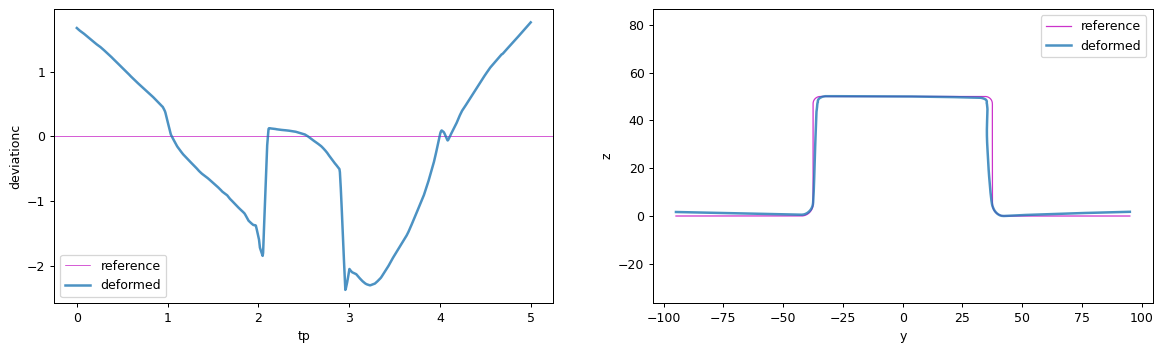

In [14]:
param = {
        'Blechdicke': 1.01, 
        'Niederhalterkraft':410.0, 
        'Ziehspalt':2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 50
    }


x, y = reg.predict(param, nb_points=1000)
df = pd.DataFrame({"x":x.ravel(), "y":y.ravel()})
label = "deformed"#""f"x0cut(t={Blechdicke:.2f}|F={Niederhalterkraft:.1f}|zp={Ziehspalt:.1f}|ep={Einlegeposition:.1f}|z={Ziehtiefe:.0f})"
plotdata = PlotData(label, df)

res = x0cut_ref.copy()
res["prediction"] = np.interp(res.tp, x.ravel(), y.ravel())
res["xr"] = res.x + res.nx * res.prediction
res["yr"] = res.y + res.ny * res.prediction
res["zr"] = res.z + res.nz * res.prediction

fig, (ax, axc) = plt.subplots(1, 2, dpi=90, figsize=(400/25.4,110/25.4))
ax.axhline(0, c="m", lw=0.5, label="reference")

p, = ax.plot(plotdata.df.x,plotdata.df.y, label=plotdata.label, alpha=.8, lw=2)
color = p.get_color()

p, = axc.plot(res.y, res.z, label="reference", alpha=.8, lw=1, c="m")
p, = axc.plot(res.yr, res.zr, label="deformed", alpha=.8, lw=2)

plotdata.color=color

ax.set_xlabel('tp')
ax.set_ylabel(reg.output_attribute)
ax.legend(loc="best")
axc.legend(loc="best")
axc.set_xlabel("y")
axc.set_ylabel("z")
axc.set_aspect("equal", "datalim")

## Comparison with the ground truth on the training set

Randomly choose an id between 0 and 877 and compare the prediction to the ground truth.

Doe_ID 35


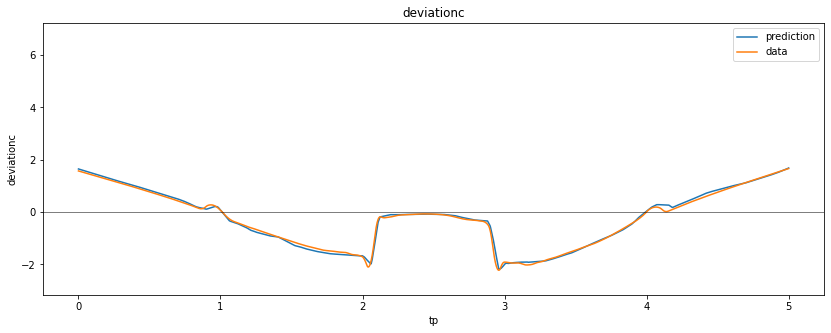

In [15]:
idx = np.random.choice(878)
print("Doe_ID", idx+1)
reg.compare(idx*1000, (idx+1)*1000)

In [16]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
reg.interactive()

interactive(children=(FloatSlider(value=1.1862613636324533, description='Blechdicke', max=1.48, min=0.99, step…

,y,z,x,t,deviation,target_idx,y_d,z_d,x_d,t_d,...,deviationc,Ziehtiefe,part,tp,dx,dy,dz,nx,ny,nz
0,-94.864250,0.000000e+00,0.0,0.000000,0.000000,0,-94.864250,0.75,0.0,0.000,...,-0.000000,50,lu,0.000000,0.0,0.283256,3.330669e-16,0.0,-1.175853e-15,1.0
1,-94.580994,3.330669e-16,0.0,0.001001,0.000255,10,-94.581249,0.75,0.0,0.001,...,-0.000255,50,lu,0.004808,0.0,0.283256,1.665335e-16,0.0,-5.879263e-16,1.0
2,-94.297739,3.330669e-16,0.0,0.002002,0.000510,20,-94.298249,0.75,0.0,0.002,...,0.000510,50,lu,0.009615,0.0,0.283256,1.110223e-16,0.0,-3.919508e-16,1.0
3,-94.014483,5.551115e-16,0.0,0.003003,0.000765,30,-94.015248,0.75,0.0,0.003,...,-0.000765,50,lu,0.014423,0.0,0.283256,5.551115e-17,0.0,-1.959754e-16,1.0
4,-93.731227,4.440892e-16,0.0,0.004004,0.001020,40,-93.732247,0.75,0.0,0.004,...,0.001020,50,lu,0.019231,0.0,0.283256,-5.551115e-17,-0.0,1.959754e-16,1.0


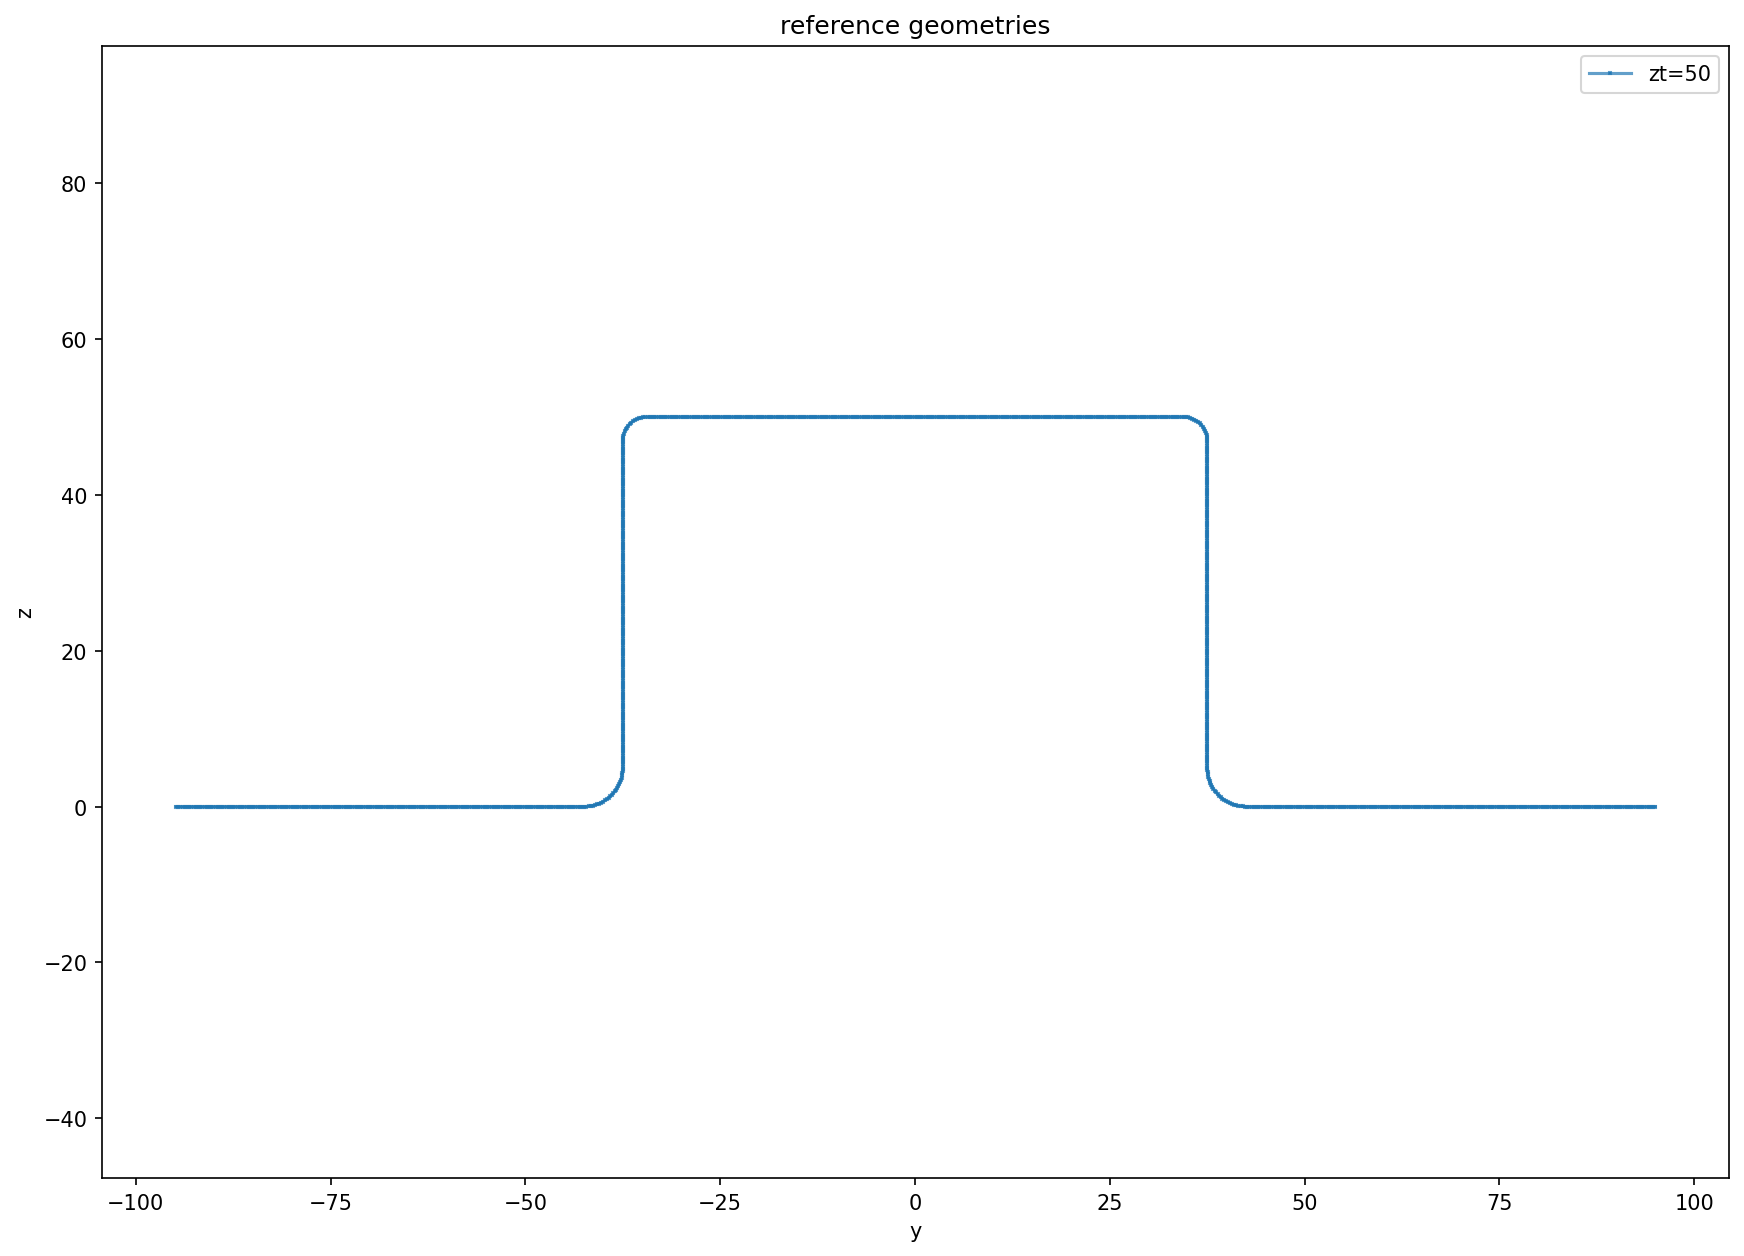

In [17]:
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.plot(x0cut_ref.y, x0cut_ref.z, marker="s", ms=1, alpha=.7, label=f"zt=50")
ax.legend(loc="best")
ax.set_title("reference geometries")
ax.set_xlabel("y")
ax.set_ylabel("z")
ax.set_aspect("equal", "datalim")
x0cut_ref.head()

In [18]:
reg.X

array([[-0.79318655,  1.07138178,  0.        , ...,  0.        ,
         0.        , -1.72262093],
       [-0.79318655,  1.07138178,  0.        , ...,  0.        ,
         0.        , -1.71979355],
       [-0.79318655,  1.07138178,  0.        , ...,  0.        ,
         0.        , -1.71696618],
       ...,
       [ 1.32184121, -0.90803348,  0.        , ...,  0.        ,
         0.        ,  1.70698517],
       [ 1.32184121, -0.90803348,  0.        , ...,  0.        ,
         0.        ,  1.70981259],
       [ 1.32184121, -0.90803348,  0.        , ...,  0.        ,
         0.        ,  1.71264001]])

In [19]:
reg.X.shape

(880000, 19)

In [20]:
reg.features

['Blechdicke',
 'Niederhalterkraft',
 'Ziehspalt',
 'Einlegeposition',
 'Ziehtiefe',
 'tp']

In [21]:
reg.position_attribute

'tp'

Doe_ID 436


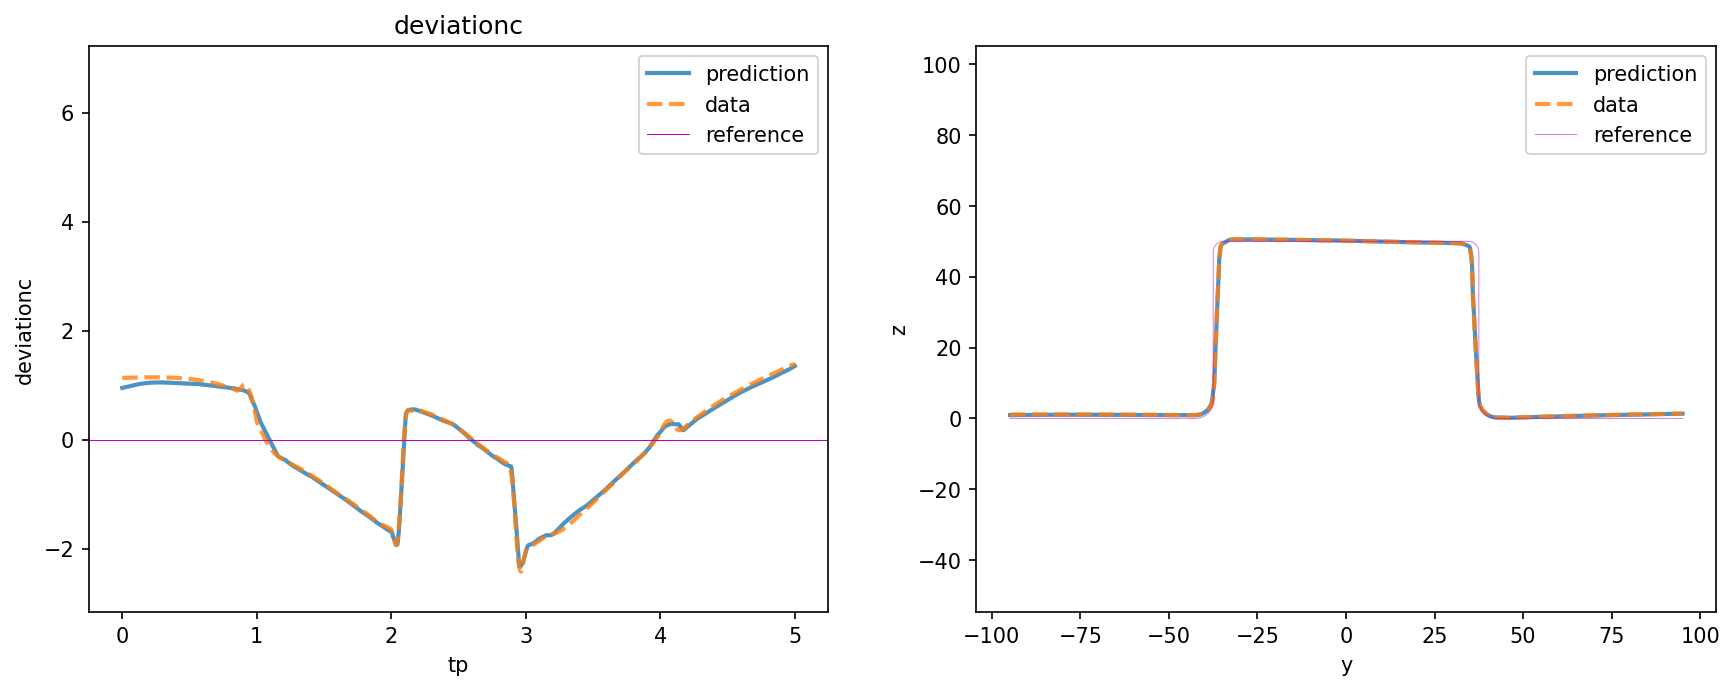

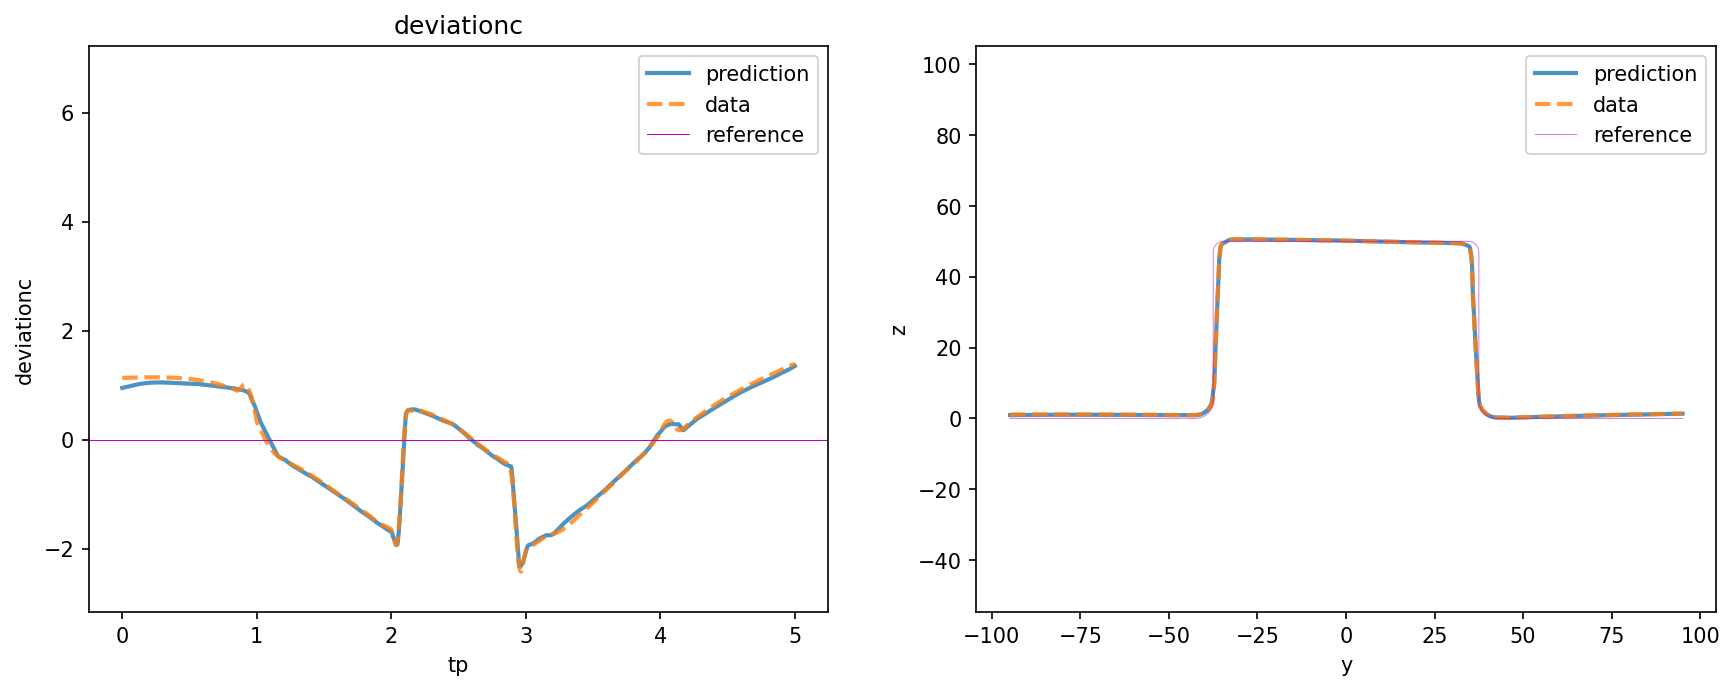

In [22]:
idx = np.random.choice(878)
print("Doe_ID", idx+1)
#reg.compare(idx*1000, (idx+1)*1000)
reg.compare_shape(idx*1000, (idx+1)*1000, x0cut_ref)

In [23]:
start, stop = idx*1000, (idx+1)*1000
reg.X[start:stop].shape

(1000, 19)